In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from flask import Flask, request, jsonify
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
import pandas as pd
inputfile = r'C:\Users\hp\OneDrive\Documents\Desktop\final model\data\84e02633-00ca-47e8-97ec-c0093313ddcd.csv'


raw_data = pd.read_csv(inputfile, delimiter=',')
print(raw_data.head(100))

    _id        STATION            MSMT_DATE  WLM_RPE  WLM_RPE_QC  WLM_GSE  \
0     1  01N04E36Q001M  2005-04-30T00:00:00      9.1           1      6.9   
1     2  01N04E36Q001M  2005-05-01T00:00:00      9.1           1      6.9   
2     3  01N04E36Q001M  2005-05-02T00:00:00      9.1           1      6.9   
3     4  01N04E36Q001M  2005-05-03T00:00:00      9.1           1      6.9   
4     5  01N04E36Q001M  2005-05-04T00:00:00      9.1           1      6.9   
..  ...            ...                  ...      ...         ...      ...   
95   96  01N04E36Q001M  2005-08-03T00:00:00      9.1           1      6.9   
96   97  01N04E36Q001M  2005-08-04T00:00:00      9.1           1      6.9   
97   98  01N04E36Q001M  2005-08-05T00:00:00      9.1           1      6.9   
98   99  01N04E36Q001M  2005-08-06T00:00:00      9.1           1      6.9   
99  100  01N04E36Q001M  2005-08-07T00:00:00      9.1           1      6.9   

    WLM_GSE_QC  RPE_WSE  RPE_WSE_QC  GSE_WSE  GSE_WSE_QC    WSE  WSE_QC  
0

second part of code we are load csv file

In [81]:
import pandas as pd
inputfile = r'C:\Users\hp\OneDrive\Documents\Desktop\final model\data\84e02633-00ca-47e8-97ec-c0093313ddcd.csv'


raw_data = pd.read_csv(inputfile, delimiter=',')


print(raw_data.info())  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144000 entries, 0 to 2143999
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   _id         int64  
 1   STATION     object 
 2   MSMT_DATE   object 
 3   WLM_RPE     float64
 4   WLM_RPE_QC  int64  
 5   WLM_GSE     float64
 6   WLM_GSE_QC  int64  
 7   RPE_WSE     float64
 8   RPE_WSE_QC  int64  
 9   GSE_WSE     float64
 10  GSE_WSE_QC  int64  
 11  WSE         float64
 12  WSE_QC      int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 212.6+ MB
None


3rd part of code

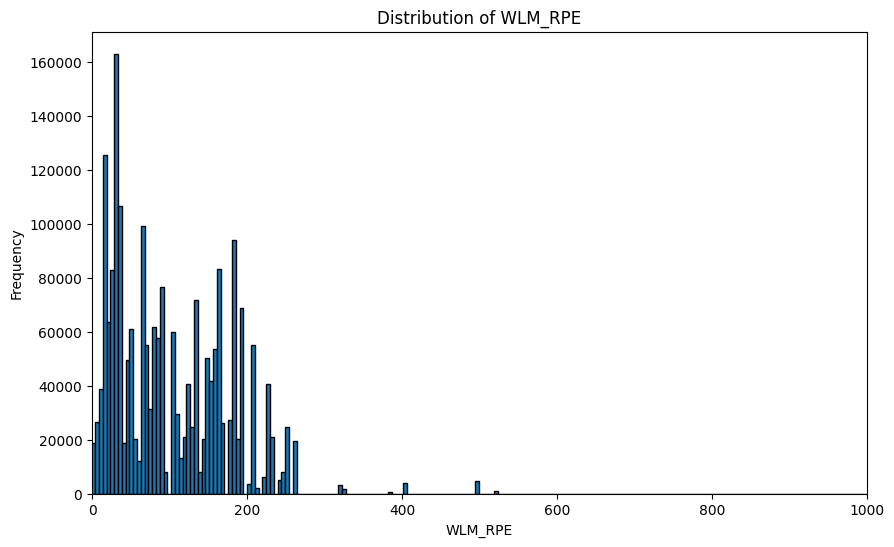

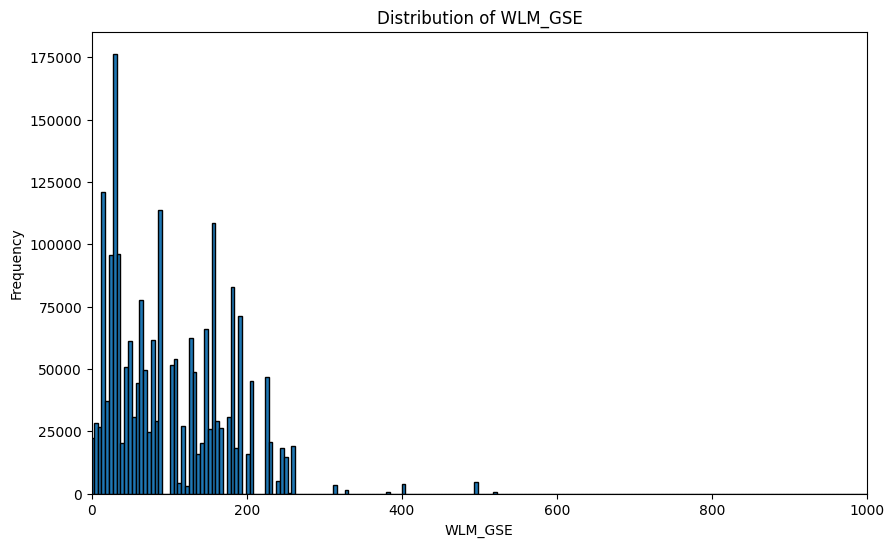

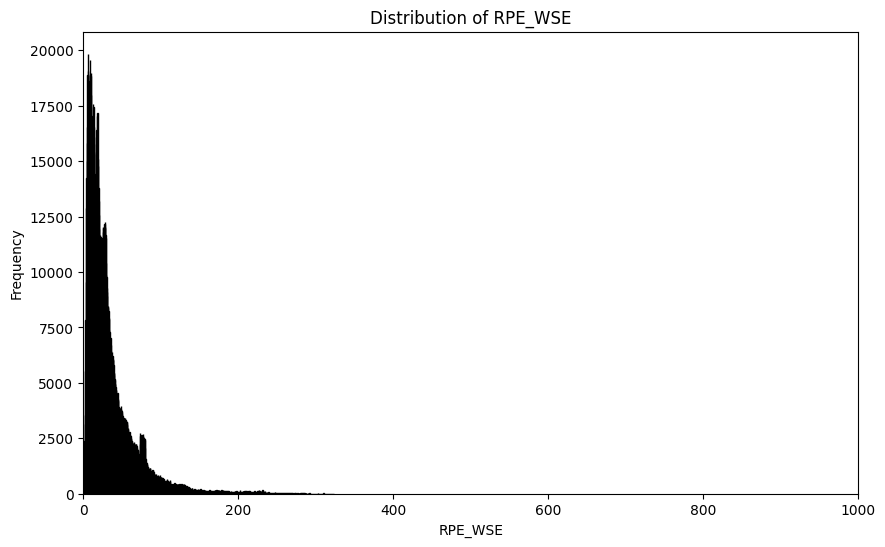

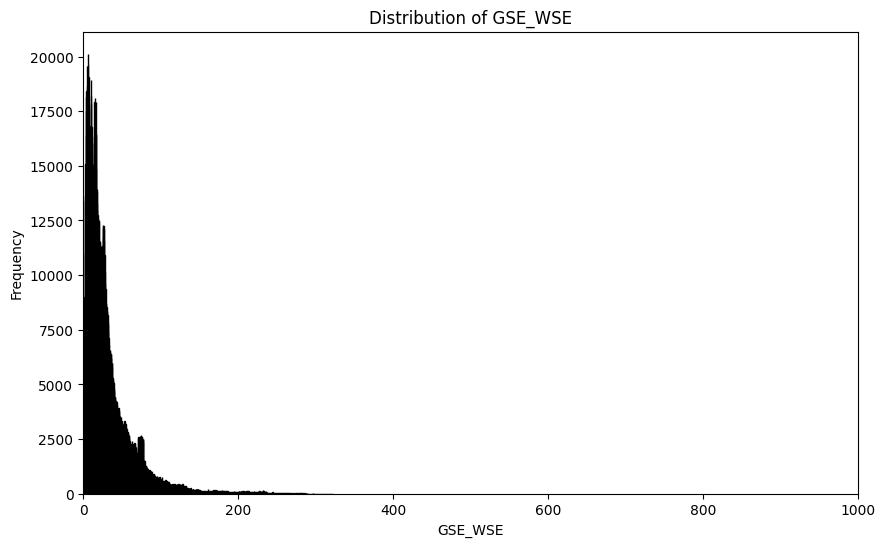

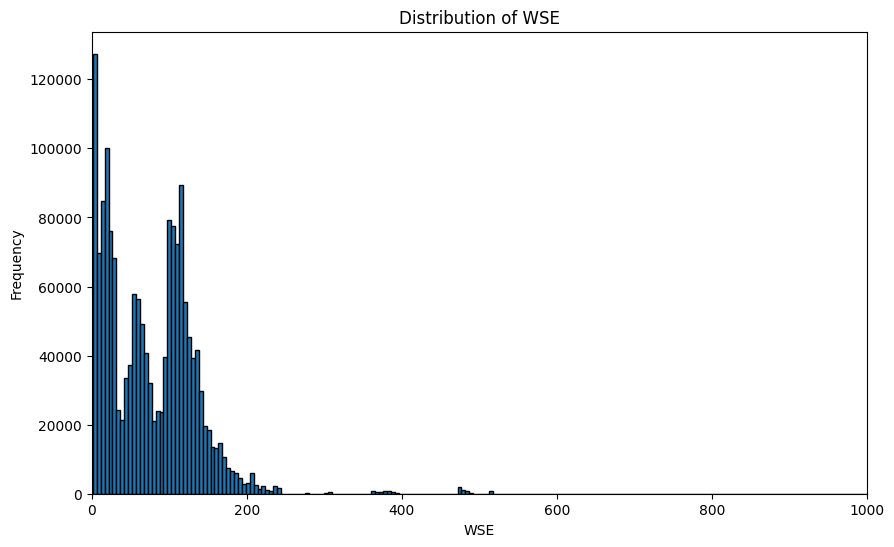

In [82]:
import matplotlib.pyplot as plt

# Plotting histograms for each relevant column
columns_to_plot = ['WLM_RPE', 'WLM_GSE', 'RPE_WSE', 'GSE_WSE', 'WSE']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.hist(raw_data[column].dropna(), bins=1000, edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xlim(0, 1000) 
    plt.show()


In [83]:
import pandas as pd

inputfile = r'C:\Users\hp\OneDrive\Documents\Desktop\final model\data\84e02633-00ca-47e8-97ec-c0093313ddcd.csv'


raw_data = pd.read_csv(inputfile, delimiter=',')


print(raw_data.shape[0])

2144000


In [84]:
missing_percentage = (raw_data.isnull().sum() / raw_data.shape[0]) * 100
print(missing_percentage)



_id            0.000000
STATION        0.000000
MSMT_DATE      0.000000
WLM_RPE        0.000000
WLM_RPE_QC     0.000000
WLM_GSE        0.550886
WLM_GSE_QC     0.000000
RPE_WSE       11.397201
RPE_WSE_QC     0.000000
GSE_WSE       11.910541
GSE_WSE_QC     0.000000
WSE           11.397201
WSE_QC         0.000000
dtype: float64


In [ ]:
raw_data['STATION'] = raw_data['STATION'].astype('category')
raw_data['MSMT_DATE'] = pd.to_datetime(raw_data['MSMT_DATE'])
print(raw_data.dtypes)



_id                    int64
STATION             category
MSMT_DATE     datetime64[ns]
WLM_RPE              float64
WLM_RPE_QC             int64
WLM_GSE              float64
WLM_GSE_QC             int64
RPE_WSE              float64
RPE_WSE_QC             int64
GSE_WSE              float64
GSE_WSE_QC             int64
WSE                  float64
WSE_QC                 int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
raw_data['STATION'] = label_encoder.fit_transform(raw_data['STATION'])


In [ ]:
raw_data.drop_duplicates(inplace=True)


In [ ]:


print(raw_data['MSMT_DATE'].min(), raw_data['MSMT_DATE'].max())


1970-01-01 00:00:00 2024-08-22 00:00:00


OUTLIER IS PRESENT

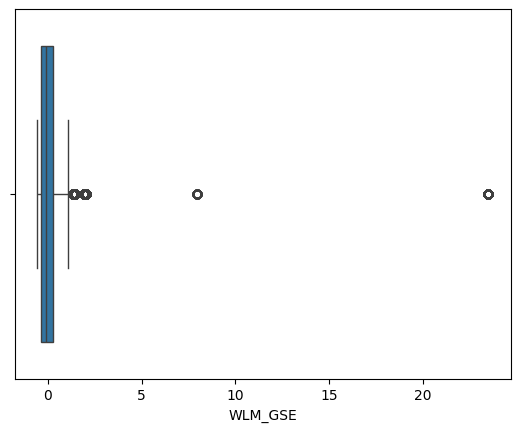

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="WLM_GSE",data=raw_data)


plt.show()

DELETE THE OUTLIER VALUE WLM_GSE

DELETE THE OUTLIER VALUE OF WSE

DELETE THE OUTLIER VALUE OF WLM_RPE

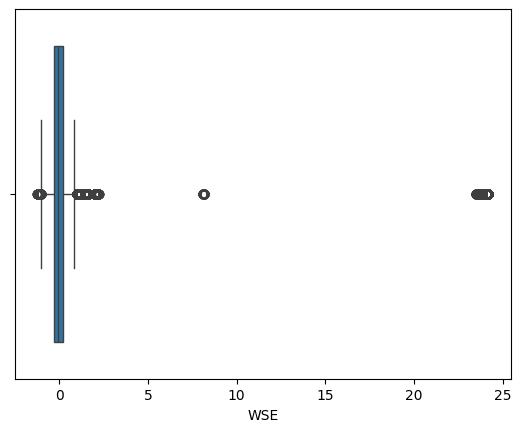

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="WSE",data=raw_data)


plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_10692\251712112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data["WSE"])


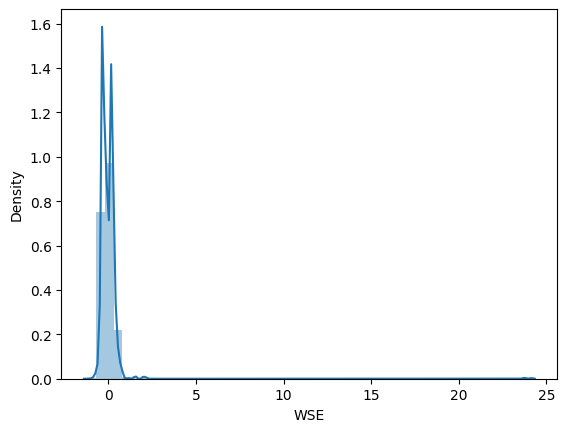

In [ ]:
sns.distplot(raw_data["WSE"])
plt.show()

OUTLIER IS PRESENT

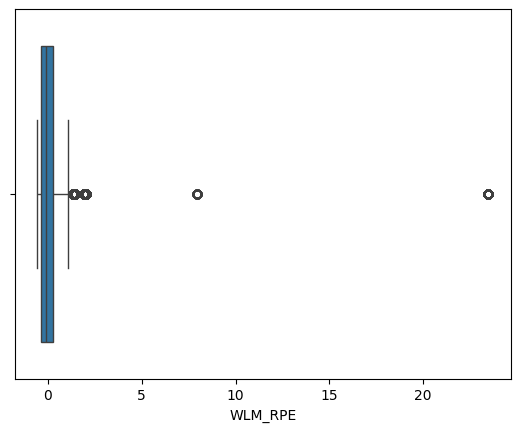

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="WLM_RPE",data=raw_data)


plt.show()

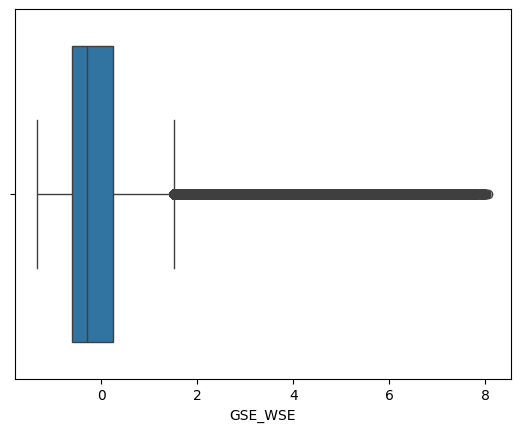

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="GSE_WSE",data=raw_data)


plt.show()

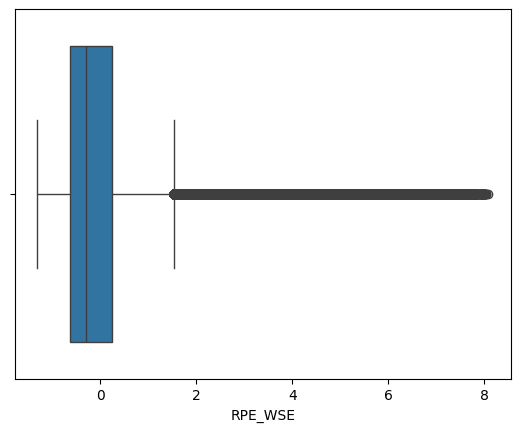

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="RPE_WSE",data=raw_data)


plt.show()

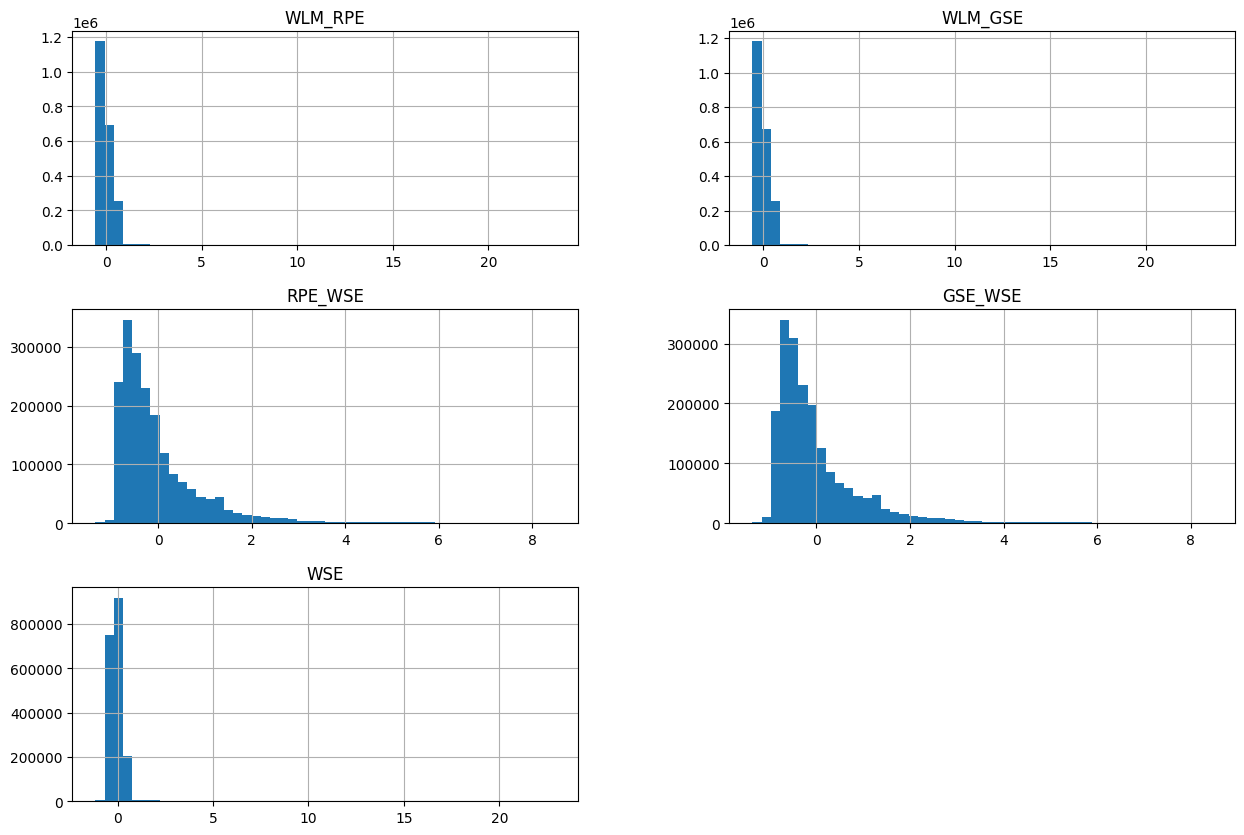

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for normalized columns
raw_data[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.show()


In [ ]:
# Ensure 'MSMT_DATE' is in datetime format
raw_data['MSMT_DATE'] = pd.to_datetime(raw_data['MSMT_DATE'], errors='coerce')

# Sort the DataFrame by 'MSMT_DATE'
raw_data_sorted = raw_data.sort_values(by='MSMT_DATE')

# Reset index to ensure continuous indexing after sorting
raw_data_sorted.reset_index(drop=True, inplace=True)

# Check the new range of dates
date_range_sorted = raw_data_sorted['MSMT_DATE'].min(), raw_data_sorted['MSMT_DATE'].max()
print(f"Date Range after Sorting: {date_range_sorted}")

# Check if dates are in increasing order
date_check = raw_data_sorted['MSMT_DATE'].is_monotonic_increasing
print(f"Dates are in increasing order: {date_check}")

# Optional: Display the first and last few rows to confirm
print("First few rows after sorting:")
print(raw_data_sorted.head())

print("Last few rows after sorting:")
print(raw_data_sorted.tail())


Date Range after Sorting: (Timestamp('1970-01-01 00:00:00'), Timestamp('2024-08-22 00:00:00'))
Dates are in increasing order: True
First few rows after sorting:
       _id  STATION  MSMT_DATE   WLM_RPE  WLM_RPE_QC   WLM_GSE  WLM_GSE_QC  \
0  1599821      341 1970-01-01  0.369416   -0.012792  0.368541   -0.024265   
1  1599822      341 1970-01-02  0.369416   -0.012792  0.368541   -0.024265   
2  1599823      341 1970-01-03  0.369416   -0.012792  0.368541   -0.024265   
3  1599824      341 1970-01-04  0.369416   -0.012792  0.368541   -0.024265   
4  1599825      341 1970-01-05  0.369416   -0.012792  0.368541   -0.024265   

    RPE_WSE  RPE_WSE_QC   GSE_WSE  GSE_WSE_QC       WSE    WSE_QC  
0  1.153814    -0.36406  1.143222   -0.353681  0.178317 -0.345227  
1  1.153843    -0.36406  1.143252   -0.353681  0.178312 -0.345227  
2  1.153843    -0.36406  1.143252   -0.353681  0.178312 -0.345227  
3  1.153873    -0.36406  1.143281   -0.353681  0.178307 -0.345227  
4  1.153873    -0.36406  1.143

0


In [ ]:
# Check unique values for categorical columns
print(raw_data['STATION'].unique())


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

          WLM_RPE   WLM_GSE   RPE_WSE   GSE_WSE       WSE
WLM_RPE  1.000000  0.999975  0.214211  0.209722  0.987246
WLM_GSE  0.999975  1.000000  0.213799  0.210181  0.987226
RPE_WSE  0.214211  0.213799  1.000000  0.999105  0.055973
GSE_WSE  0.209722  0.210181  0.999105  1.000000  0.051731
WSE      0.987246  0.987226  0.055973  0.051731  1.000000


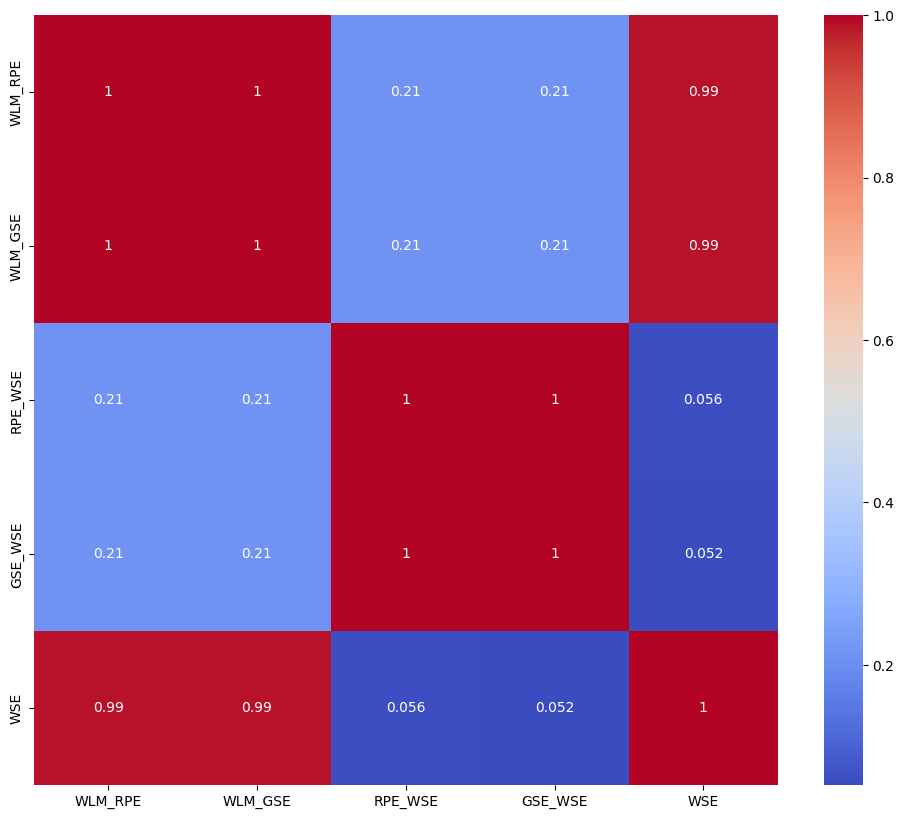

In [ ]:
# Correlation matrix
correlation_matrix = raw_data[columns_to_normalize].corr()
print(correlation_matrix)

# Heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
target_correlation = raw_data.corr()['WSE'].sort_values()
print(target_correlation)


WSE_QC       -0.029064
WLM_RPE_QC   -0.027083
GSE_WSE_QC   -0.021892
WLM_GSE_QC   -0.020420
RPE_WSE_QC   -0.016958
MSMT_DATE     0.022329
GSE_WSE       0.051731
RPE_WSE       0.055973
STATION       0.293907
_id           0.300253
WLM_GSE       0.987226
WLM_RPE       0.987246
WSE           1.000000
Name: WSE, dtype: float64


In [101]:
import pandas as pd
import numpy as np

# Convert MSMT_DATE to datetime
raw_data['MSMT_DATE'] = pd.to_datetime(raw_data['MSMT_DATE'])

# Temporal features
raw_data['Year'] = raw_data['MSMT_DATE'].dt.year
raw_data['Month'] = raw_data['MSMT_DATE'].dt.month
raw_data['Day'] = raw_data['MSMT_DATE'].dt.day
raw_data['DayOfYear'] = raw_data['MSMT_DATE'].dt.dayofyear

# Lag features
raw_data['WSE_Lag_1'] = raw_data['WSE'].shift(1)
raw_data['WSE_Lag_7'] = raw_data['WSE'].shift(7)
raw_data['WSE_Lag_30'] = raw_data['WSE'].shift(30)

# Rolling statistics
raw_data['WSE_Rolling_Mean_7'] = raw_data['WSE'].rolling(window=7).mean()
raw_data['WSE_Rolling_Std_7'] = raw_data['WSE'].rolling(window=7).std()

# Seasonal features
raw_data['Month_Sin'] = np.sin(2 * np.pi * raw_data['Month'] / 12)
raw_data['Month_Cos'] = np.cos(2 * np.pi * raw_data['Month'] / 12)

# Interaction features
raw_data['WSE_X_WLM_RPE'] = raw_data['WSE'] * raw_data['WLM_RPE']

# Handle missing values (if any) and normalize features
raw_data.fillna(method='ffill', inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(raw_data[['WLM_RPE', 'WLM_GSE', 'RPE_WSE', 'GSE_WSE', 'WSE']])
raw_data[['WLM_RPE', 'WLM_GSE', 'RPE_WSE', 'GSE_WSE', 'WSE']] = scaled_features


C:\Users\hp\AppData\Local\Temp\ipykernel_10692\3104296984.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_data.fillna(method='ffill', inplace=True)


In [106]:
print(raw_data.isnull().sum())


_id                   0
STATION               0
MSMT_DATE             0
WLM_RPE               0
WLM_RPE_QC            0
WLM_GSE               0
WLM_GSE_QC            0
RPE_WSE               0
RPE_WSE_QC            0
GSE_WSE               0
GSE_WSE_QC            0
WSE                   0
WSE_QC                0
Year                  0
Month                 0
Day                   0
DayOfYear             0
WSE_Lag_1             0
WSE_Lag_7             0
WSE_Lag_30            0
WSE_Rolling_Mean_7    0
WSE_Rolling_Std_7     0
Month_Sin             0
Month_Cos             0
WSE_X_WLM_RPE         0
dtype: int64


In [103]:
raw_data['WSE_Lag_1'].fillna(raw_data['WSE_Lag_1'].mean(), inplace=True)
raw_data['WSE_Lag_7'].fillna(raw_data['WSE_Lag_7'].mean(), inplace=True)
raw_data['WSE_Lag_30'].fillna(raw_data['WSE_Lag_30'].mean(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_10692\3027939287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['WSE_Lag_1'].fillna(raw_data['WSE_Lag_1'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10692\3027939287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [105]:
# Impute missing values in rolling mean and std columns
raw_data['WSE_Rolling_Mean_7'].fillna(raw_data['WSE_Rolling_Mean_7'].mean(), inplace=True)
raw_data['WSE_Rolling_Std_7'].fillna(raw_data['WSE_Rolling_Std_7'].mean(), inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_10692\224790594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['WSE_Rolling_Mean_7'].fillna(raw_data['WSE_Rolling_Mean_7'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10692\224790594.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [100]:
print(raw_data.isnull().sum())

_id           0
STATION       0
MSMT_DATE     0
WLM_RPE       0
WLM_RPE_QC    0
WLM_GSE       0
WLM_GSE_QC    0
RPE_WSE       0
RPE_WSE_QC    0
GSE_WSE       0
GSE_WSE_QC    0
WSE           0
WSE_QC        0
dtype: int64


In [99]:
print(raw_data.dtypes)


_id             int64
STATION        object
MSMT_DATE      object
WLM_RPE       float64
WLM_RPE_QC      int64
WLM_GSE       float64
WLM_GSE_QC      int64
RPE_WSE       float64
RPE_WSE_QC      int64
GSE_WSE       float64
GSE_WSE_QC      int64
WSE           float64
WSE_QC          int64
dtype: object


_id           0
STATION       0
MSMT_DATE     0
WLM_RPE       0
WLM_RPE_QC    0
WLM_GSE       0
WLM_GSE_QC    0
RPE_WSE       0
RPE_WSE_QC    0
GSE_WSE       0
GSE_WSE_QC    0
WSE           0
WSE_QC        0
dtype: int64


In [ ]:
# Check if there are any missing values left
print(raw_data.isnull().sum())

_id           0
STATION       0
MSMT_DATE     0
WLM_RPE       0
WLM_RPE_QC    0
WLM_GSE       0
WLM_GSE_QC    0
RPE_WSE       0
RPE_WSE_QC    0
GSE_WSE       0
GSE_WSE_QC    0
WSE           0
WSE_QC        0
dtype: int64


In [96]:
raw_data['WLM_GSE'].fillna(raw_data['WLM_GSE'].mean(), inplace=True)
raw_data['RPE_WSE'].interpolate(method='linear', inplace=True)
raw_data['WSE'].interpolate(method='linear', inplace=True)
raw_data['GSE_WSE'].interpolate(method='linear', inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_10692\3324326973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['WLM_GSE'].fillna(raw_data['WLM_GSE'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10692\3324326973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [97]:
# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
_id           0
STATION       0
MSMT_DATE     0
WLM_RPE       0
WLM_RPE_QC    0
WLM_GSE       0
WLM_GSE_QC    0
RPE_WSE       0
RPE_WSE_QC    0
GSE_WSE       0
GSE_WSE_QC    0
WSE           0
WSE_QC        0
dtype: int64


In [98]:


print(raw_data.describe())


                _id       WLM_RPE    WLM_RPE_QC       WLM_GSE    WLM_GSE_QC  \
count  2.144000e+06  2.144000e+06  2.144000e+06  2.144000e+06  2.144000e+06   
mean   1.072000e+06  1.090655e+02  1.034804e+01  1.069184e+02  1.070094e+01   
std    6.189196e+05  2.040371e+02  2.720746e+01  2.038684e+02  2.888647e+01   
min    1.000000e+00 -5.780000e+00  1.000000e+00 -7.380000e+00  1.000000e+00   
25%    5.360008e+05  3.435000e+01  1.000000e+00  3.271000e+01  1.000000e+00   
50%    1.072000e+06  8.682500e+01  1.000000e+00  8.650000e+01  1.000000e+00   
75%    1.608000e+06  1.605700e+02  1.000000e+00  1.577500e+02  1.000000e+00   
max    2.144000e+06  4.898860e+03  1.300000e+02  4.896000e+03  1.510000e+02   

            RPE_WSE    RPE_WSE_QC       GSE_WSE    GSE_WSE_QC           WSE  \
count  2.144000e+06  2.144000e+06  2.144000e+06  2.144000e+06  2.144000e+06   
mean   3.452643e+01  2.953780e+01  3.258384e+01  3.824271e+01  7.454880e+01   
std    3.583434e+01  7.838765e+01  3.587178e+01  7.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlations with the target variable
correlation = raw_data.corr()['WSE'].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(raw_data[columns_to_scale + ['WSE']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Print sorted feature correlations
print(correlation)


NameError: name 'raw_data' is not defined

In [108]:
# Check the data types of each column
print(raw_data.dtypes)


_id                            int64
STATION                       object
MSMT_DATE             datetime64[ns]
WLM_RPE                      float64
WLM_RPE_QC                     int64
WLM_GSE                      float64
WLM_GSE_QC                     int64
RPE_WSE                      float64
RPE_WSE_QC                     int64
GSE_WSE                      float64
GSE_WSE_QC                     int64
WSE                          float64
WSE_QC                         int64
Year                           int32
Month                          int32
Day                            int32
DayOfYear                      int32
WSE_Lag_1                    float64
WSE_Lag_7                    float64
WSE_Lag_30                   float64
WSE_Rolling_Mean_7           float64
WSE_Rolling_Std_7            float64
Month_Sin                    float64
Month_Cos                    float64
WSE_X_WLM_RPE                float64
dtype: object


In [109]:
# Select only numeric columns for correlation analysis
numeric_columns = raw_data.select_dtypes(include=['number']).columns
print(numeric_columns)

# Calculate correlations only on numeric columns
correlation = raw_data[numeric_columns].corr()['WSE'].sort_values(ascending=False)


Index(['_id', 'WLM_RPE', 'WLM_RPE_QC', 'WLM_GSE', 'WLM_GSE_QC', 'RPE_WSE',
       'RPE_WSE_QC', 'GSE_WSE', 'GSE_WSE_QC', 'WSE', 'WSE_QC', 'Year', 'Month',
       'Day', 'DayOfYear', 'WSE_Lag_1', 'WSE_Lag_7', 'WSE_Lag_30',
       'WSE_Rolling_Mean_7', 'WSE_Rolling_Std_7', 'Month_Sin', 'Month_Cos',
       'WSE_X_WLM_RPE'],
      dtype='object')
